
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 2 <br>
</div>


---



### Full Name : Amir Malekhosseini
### Student Number : 401100528
___

In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage.metrics
from scipy.fftpack import dct, idct

## **Q1: DFT Transformation**

**DFT transform**

In [18]:
def dft(image):
    
    output_image = np.fft.fft2(image)
    return output_image


def shift_fft(dft):
    
    output_image = np.fft.fftshift(dft)
    return output_image


def inverse_shift(shifted_image):
    
    output_image = np.fft.ifftshift(shifted_image)
    return output_image


def idft(image):
    
    output_image = np.real(np.fft.ifft2(image))
    return output_image

In [ ]:
# Functions for visualization 
def display_dft_magnitude(dft_data, title="DFT Magnitude"):
    magnitude_spectrum = np.abs(dft_data)
    log_magnitude_spectrum = np.log1p(magnitude_spectrum)
    plt.imshow(log_magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')


def display_dct_coeffs(dct_data, title="DCT Coefficients"):
    log_abs_coeffs = np.log1p(np.abs(dct_data))
    plt.imshow(log_abs_coeffs, cmap='gray')
    plt.colorbar()
    plt.title(title)
    plt.axis('off')


def display_images(img_list, titles_list, fig_title="Image Comparison"):
    plt.figure(figsize=(len(img_list) * 4, 4))
    plt.suptitle(fig_title, fontsize=16)
    for i, img in enumerate(img_list):
        plt.subplot(1, len(img_list), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titles_list[i])
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**DCT transform**

In [20]:

def dct_transform(image):
    
    output_image = dct(dct(image.T, type=2, norm='ortho').T,
                       type=2, norm='ortho')
    return output_image


def idct_transform(dct_coeffs):
  
    output_image = idct(
        idct(dct_coeffs.T, type=2, norm='ortho').T, type=2, norm='ortho')
    
    return output_image

--- Question 5 ---

 Part (الف):


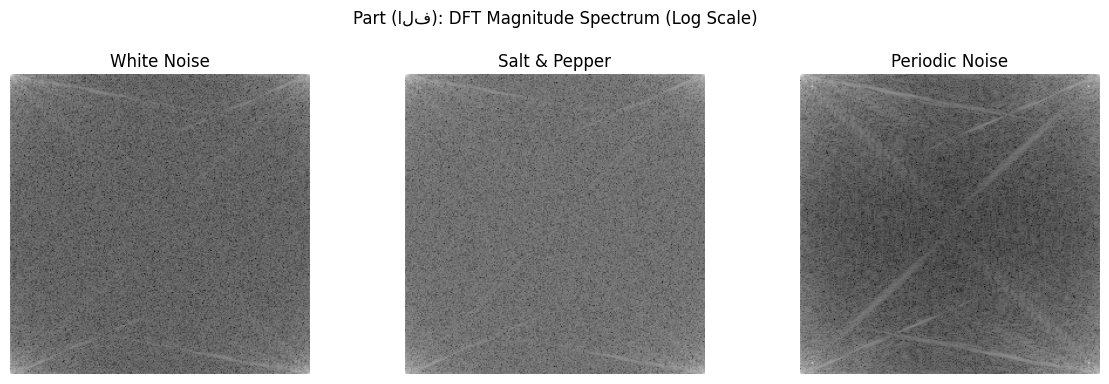


 Part (ب):


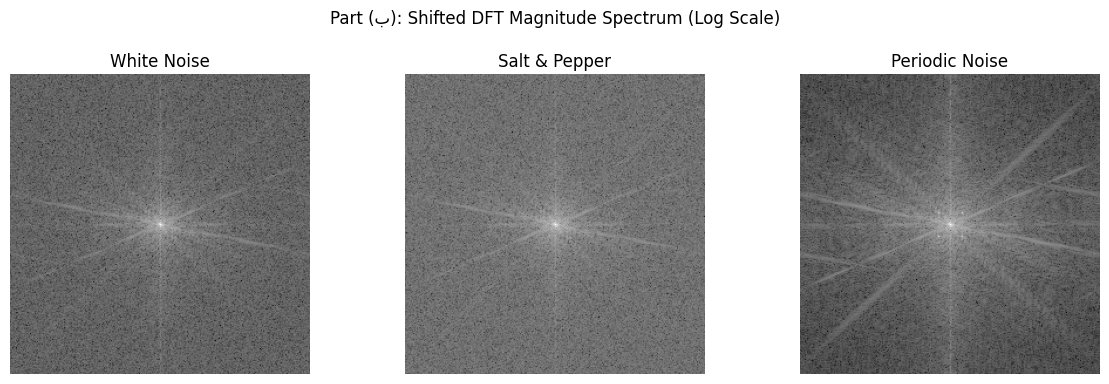


Explanation for Part (ب):
The DFT is shifted using np.fft.fftshift() to move the zero-frequency component (DC component)
from the top-left corner to the center of the spectrum. This arrangement is more intuitive
for visualization and filter design, as low frequencies are now in the center and high
frequencies are towards the edges, similar to how optical Fourier transforms appear.

 Part (ج): 


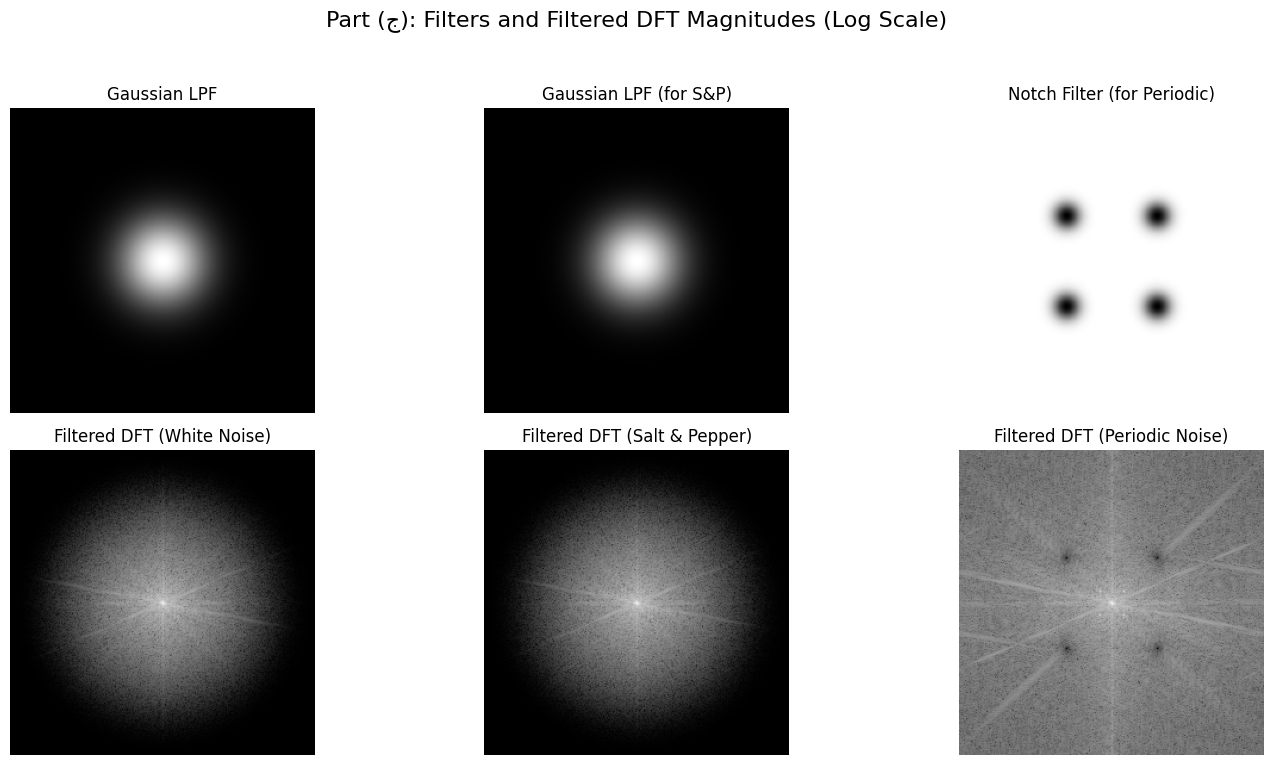


 Explanation for Part (ج) Filter Properties:
Filters applied in the frequency domain should ideally ensure that the inverse transform
results in a real-valued image (since images have real pixel values).
For the DFT, if the original image is real, its DFT exhibits conjugate symmetry (F(u,v) = F*(-u,-v)).
To maintain this property after filtering (H * F), the filter H(u,v) should also be
conjugate symmetric. A common simplification is to use filters that are real and
centro-symmetric (H(u,v) = H(-u,-v)), like the Gaussian and idealized Notch filters designed here.
This ensures the filtered DFT retains conjugate symmetry, leading to a real spatial domain image after IDFT.
Our filters (Gaussian LPF, Notch) are real and symmetric around the center (DC) in the shifted domain.

 Part (چ):
MSE (Mean Squared Error): Calculates the average squared difference between pixel values of the original and reconstructed images. Lower values are better, indicating less error. MSE = (1/MN) * ΣΣ[I(i,j) -

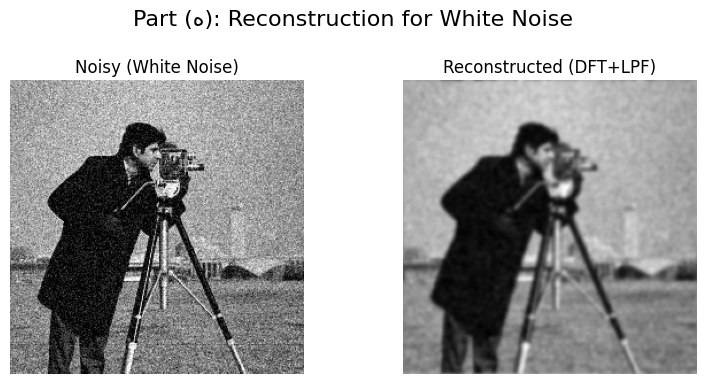

Metrics for White Noise (DFT Filtered):
  MSE: 324.6943
  PSNR: 23.0161 dB
  SSIM: 0.6830
--------------------


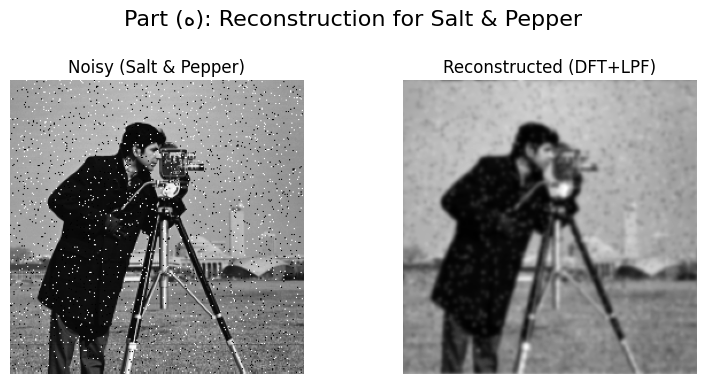

Metrics for Salt & Pepper (DFT Filtered):
  MSE: 336.6857
  PSNR: 22.8586 dB
  SSIM: 0.6614
--------------------


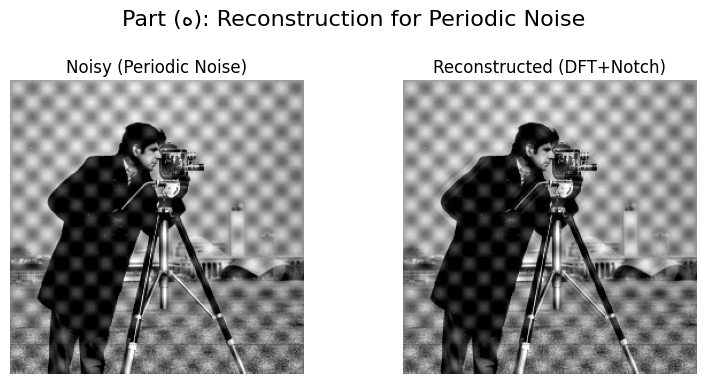

Metrics for Periodic Noise (DFT Filtered):
  MSE: 595.2473
  PSNR: 20.3838 dB
  SSIM: 0.4664
--------------------

 Qualitative Assessment (Part ه):
- White Noise: The LPF typically blurs the image while reducing noise. Effectiveness depends on the cutoff.
- Salt & Pepper: The LPF blurs the noise spots but also the image significantly. Not the best approach for S&P.
- Periodic Noise: The Notch filter should effectively remove the periodic pattern (seen as spikes in DFT) with less blurring than a general LPF.

 Part (خ):


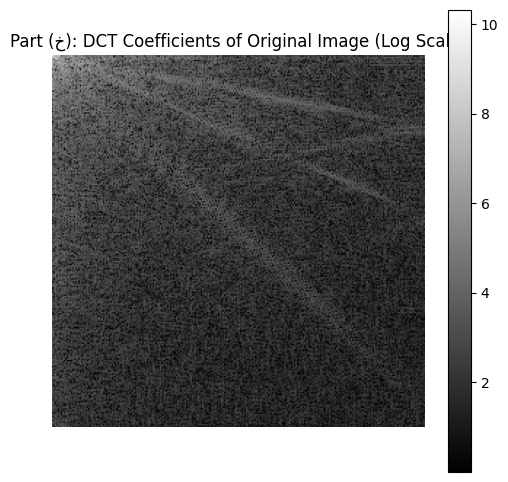

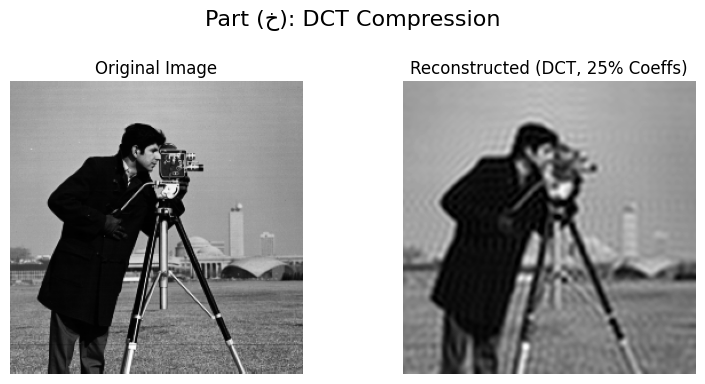


 Part (د):
Comparison of DCT Reconstruction with Original:
  MSE: 307.3073
  PSNR: 23.2551 dB
  SSIM: 0.7106

 Explanation of DCT for Compression:
The Discrete Cosine Transform (DCT), particularly DCT-II, has strong 'energy compaction' properties.
This means that for typical images, most of the signal energy (important visual information)
is concentrated in a few low-frequency coefficients, located in the top-left corner of the DCT matrix.
High-frequency coefficients (bottom-right) usually represent finer details or noise and often have small magnitudes.
By creating a filter (mask) that keeps only the low-frequency coefficients (like the top-left block)
and setting the rest to zero (quantization is also used in practice, e.g., JPEG), we discard less visually significant information.
Applying the Inverse DCT (IDCT) reconstructs an approximation of the original image using only these few coefficients.
This allows for significant data compression, as fewer coefficients need to be stored 

In [21]:

# Load images
try:
    img_original = cv2.imread('Images\original_image.png', cv2.IMREAD_GRAYSCALE)
    img_white_noise = cv2.imread('Images\white_noise.png', cv2.IMREAD_GRAYSCALE)
    img_salt_pepper = cv2.imread(
        'Images\salt_and_pepper_noise.png', cv2.IMREAD_GRAYSCALE)
    img_periodic = cv2.imread('Images\periodic_noise.png', cv2.IMREAD_GRAYSCALE)

    if img_original is None:
        raise FileNotFoundError("Original image not found")
    if img_white_noise is None:
        raise FileNotFoundError("White noise image not found")
    if img_salt_pepper is None:
        raise FileNotFoundError("Salt & Pepper image not found")
    if img_periodic is None:
        raise FileNotFoundError("Periodic noise image not found")

    noisy_images = {
        "White Noise": img_white_noise,
        "Salt & Pepper": img_salt_pepper,
        "Periodic Noise": img_periodic
    }


    rows, cols = img_original.shape

except FileNotFoundError as e:
    print(f"Error loading image: {e}")
    print("Please ensure 'lena_gray.png', 'white_noise.png', 'salt_and_pepper_noise.png', and 'periodic_noise.png' are in the correct directory.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()

dft_results = {}
shifted_dft_results = {}
filtered_shifted_dfts = {}
reconstructed_images = {}
metrics = {}

print("--- Question 5 ---")

# --- Part (الف):
print("\n Part (الف):")
plt.figure(figsize=(12, 4))
plt.suptitle("Part (الف): DFT Magnitude Spectrum (Log Scale)")
i = 1
for name, img in noisy_images.items():
    dft_results[name] = dft(img)
    plt.subplot(1, len(noisy_images), i)
    display_dft_magnitude(dft_results[name], name)
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Part (ب):
print("\n Part (ب):")
plt.figure(figsize=(12, 4))
plt.suptitle("Part (ب): Shifted DFT Magnitude Spectrum (Log Scale)")
i = 1
for name, dft_res in dft_results.items():
    shifted_dft_results[name] = shift_fft(dft_res)
    plt.subplot(1, len(noisy_images), i)
    display_dft_magnitude(shifted_dft_results[name], name)
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nExplanation for Part (ب):")
print("The DFT is shifted using np.fft.fftshift() to move the zero-frequency component (DC component)")
print("from the top-left corner to the center of the spectrum. This arrangement is more intuitive")
print("for visualization and filter design, as low frequencies are now in the center and high")
print("frequencies are towards the edges, similar to how optical Fourier transforms appear.")

# --- Part (ج):
print("\n Part (ج): ")

u = np.fft.fftfreq(rows)
v = np.fft.fftfreq(cols)
U, V = np.meshgrid(np.fft.fftshift(u), np.fft.fftshift(v))
D = np.sqrt(U**2 + V**2) 

# Filter Design:
# 1. Gaussian Low Pass Filter 
D0_glpf = 0.1  
gaussian_lpf = np.exp(-(D**2) / (2 * (D0_glpf**2)))

# 2. Notch Filter
u_peak1, v_peak1 = 0.15, 0.15
center_row, center_col = rows // 2, cols // 2
peak_row1 = int(center_row + u_peak1 * rows)
peak_col1 = int(center_col + v_peak1 * cols)
peak_coords = [
    (peak_row1, peak_col1), (center_row*2 -
                             peak_row1, peak_col1), 
    (peak_row1, center_col*2-peak_col1), (center_row*2 -
                                          peak_row1, center_col*2-peak_col1), 
]

notch_filter = np.ones((rows, cols))
notch_width = 0.03  
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
for pr, pc in peak_coords:
    dist_sq_from_peak = (X - pc)**2 + (Y - pr)**2
    notch_filter *= (1 - np.exp(-dist_sq_from_peak /
                     (2 * (notch_width * max(rows, cols))**2)))


# Apply Filters:
filtered_shifted_dfts["White Noise"] = shifted_dft_results["White Noise"] * gaussian_lpf
filtered_shifted_dfts["Salt & Pepper"] = shifted_dft_results["Salt & Pepper"] * gaussian_lpf
filtered_shifted_dfts["Periodic Noise"] = shifted_dft_results["Periodic Noise"] * notch_filter

# Visualize Filters and Filtered Spectrums
plt.figure(figsize=(15, 8))
plt.suptitle(
    "Part (ج): Filters and Filtered DFT Magnitudes (Log Scale)", fontsize=16)
plt.subplot(2, 3, 1)
plt.imshow(gaussian_lpf, cmap='gray')
plt.title("Gaussian LPF")
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(gaussian_lpf, cmap='gray')
plt.title("Gaussian LPF (for S&P)")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(notch_filter, cmap='gray')
plt.title("Notch Filter (for Periodic)")
plt.axis('off')
i = 4
for name, filtered_dft in filtered_shifted_dfts.items():
    plt.subplot(2, 3, i)
    display_dft_magnitude(filtered_dft, f"Filtered DFT ({name})")
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n Explanation for Part (ج) Filter Properties:")
print("Filters applied in the frequency domain should ideally ensure that the inverse transform")
print("results in a real-valued image (since images have real pixel values).")
print("For the DFT, if the original image is real, its DFT exhibits conjugate symmetry (F(u,v) = F*(-u,-v)).")
print("To maintain this property after filtering (H * F), the filter H(u,v) should also be")
print("conjugate symmetric. A common simplification is to use filters that are real and")
print("centro-symmetric (H(u,v) = H(-u,-v)), like the Gaussian and idealized Notch filters designed here.")
print("This ensures the filtered DFT retains conjugate symmetry, leading to a real spatial domain image after IDFT.")
print("Our filters (Gaussian LPF, Notch) are real and symmetric around the center (DC) in the shifted domain.")

# --- Part (چ):
print("\n Part (چ):")
print(
    "MSE (Mean Squared Error): Calculates the average squared difference between pixel values of the original and reconstructed images. Lower values are better, indicating less error. MSE = (1/MN) * ΣΣ[I(i,j) - K(i,j)]^2")
print("PSNR (Peak Signal-to-Noise Ratio): Measures the ratio between the maximum possible power of a signal (related to pixel value range, e.g., 255) and the power of corrupting noise (MSE). It's expressed in decibels (dB). Higher values are better. PSNR = 10 * log10(MAX^2 / MSE)")
print("SSIM (Structural Similarity Index Measure): Compares images based on perceived structural information, luminance, and contrast. It ranges from -1 to 1, where 1 indicates perfect similarity. Higher values (closer to 1) are better.")

# --- Part (ه): 
print("\n Part (ه):")
metrics["DFT Filtering"] = {}

for name, filtered_dft in filtered_shifted_dfts.items():
    
    inv_shifted = inverse_shift(filtered_dft)
    reconstructed = idft(inv_shifted)
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)
    reconstructed_images[name] = reconstructed

    mse = skimage.metrics.mean_squared_error(img_original, reconstructed)
    psnr = skimage.metrics.peak_signal_noise_ratio(
        img_original, reconstructed, data_range=255)
    ssim = skimage.metrics.structural_similarity(
        img_original, reconstructed, data_range=255)

    metrics["DFT Filtering"][name] = {'MSE': mse, 'PSNR': psnr, 'SSIM': ssim}

    # Display Results
    display_images(
        [noisy_images[name], reconstructed],
        [f"Noisy ({name})", f"Reconstructed (DFT+{('LPF' if 'White' in name or 'Salt' in name else 'Notch')})"],
        f"Part (ه): Reconstruction for {name}"
    )
    print(f"Metrics for {name} (DFT Filtered):")
    print(f"  MSE: {mse:.4f}")
    print(f"  PSNR: {psnr:.4f} dB")
    print(f"  SSIM: {ssim:.4f}")
    print("-" * 20)

print("\n Qualitative Assessment (Part ه):")
print("- White Noise: The LPF typically blurs the image while reducing noise. Effectiveness depends on the cutoff.")
print("- Salt & Pepper: The LPF blurs the noise spots but also the image significantly. Not the best approach for S&P.")
print("- Periodic Noise: The Notch filter should effectively remove the periodic pattern (seen as spikes in DFT) with less blurring than a general LPF.")

# --- Part (خ):
print("\n Part (خ):")


dct_original = dct_transform(img_original.astype(float))

plt.figure(figsize=(6, 6))
display_dct_coeffs(
    dct_original, "Part (خ): DCT Coefficients of Original Image (Log Scale)")
plt.show()

keep_fraction = 0.25
keep_rows = int(rows * keep_fraction)
keep_cols = int(cols * keep_fraction)

dct_mask = np.zeros((rows, cols))
dct_mask[0:keep_rows, 0:keep_cols] = 1  

dct_compressed = dct_original * dct_mask
reconstructed_dct = idct_transform(dct_compressed)
reconstructed_dct = np.clip(reconstructed_dct, 0, 255).astype(np.uint8)

# Display DCT results
display_images(
    [img_original, reconstructed_dct],
    ["Original Image",
        f"Reconstructed (DCT, {keep_fraction*100:.0f}% Coeffs)"],
    f"Part (خ): DCT Compression"
)

#  Part (د):
print("\n Part (د):")

# Quantitative Comparison for DCT
mse_dct = skimage.metrics.mean_squared_error(img_original, reconstructed_dct)
psnr_dct = skimage.metrics.peak_signal_noise_ratio(
    img_original, reconstructed_dct, data_range=255)
ssim_dct = skimage.metrics.structural_similarity(
    img_original, reconstructed_dct, data_range=255)

metrics["DCT Compression"] = {
    'MSE': mse_dct, 'PSNR': psnr_dct, 'SSIM': ssim_dct}

print("Comparison of DCT Reconstruction with Original:")
print(f"  MSE: {mse_dct:.4f}")
print(f"  PSNR: {psnr_dct:.4f} dB")
print(f"  SSIM: {ssim_dct:.4f}")

print("\n Explanation of DCT for Compression:")
print("The Discrete Cosine Transform (DCT), particularly DCT-II, has strong 'energy compaction' properties.")
print("This means that for typical images, most of the signal energy (important visual information)")
print("is concentrated in a few low-frequency coefficients, located in the top-left corner of the DCT matrix.")
print("High-frequency coefficients (bottom-right) usually represent finer details or noise and often have small magnitudes.")
print("By creating a filter (mask) that keeps only the low-frequency coefficients (like the top-left block)")
print("and setting the rest to zero (quantization is also used in practice, e.g., JPEG), we discard less visually significant information.")
print("Applying the Inverse DCT (IDCT) reconstructs an approximation of the original image using only these few coefficients.")
print("This allows for significant data compression, as fewer coefficients need to be stored or transmitted.")
print("The quality of the reconstruction depends on how many coefficients are kept (the 'keep_fraction' or quantization level).")
print("Visually, this often results in some loss of fine detail or blocky artifacts at high compression ratios.")



## **Q2: Image Cartoonization**

One of the applications of bilateral filters is for adding cartoon effects to color images. In this question we are going to implement the code to cartoonize a given image.

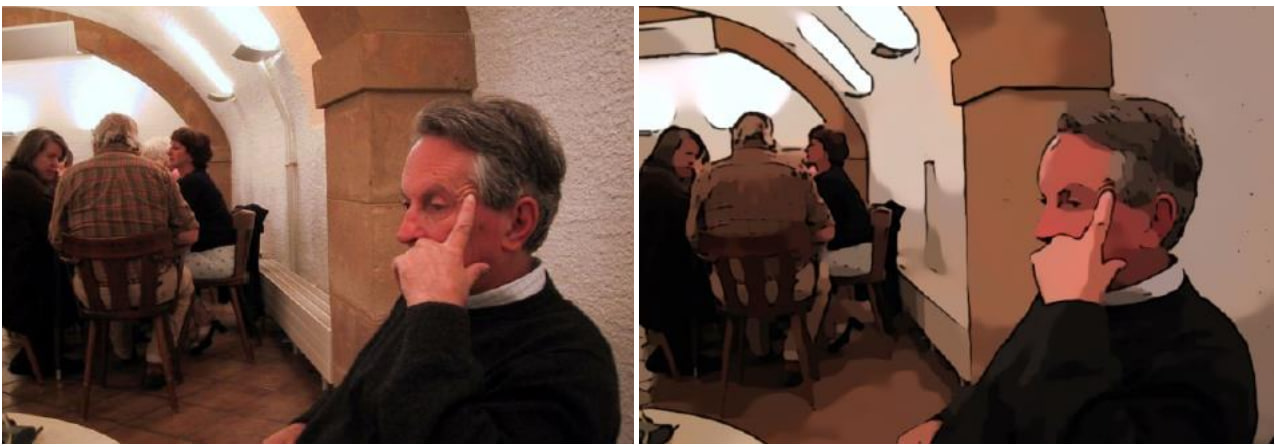

Steps for adding Cartoon effect to the given color image `img`:


1.   Blur `img` using any method you prefer to get `img_blur`.
2.   Use any edge detection method on `img_blur` to get a single channel image `img_edge`, containing the edges.
3.   Apply bilateral filter on the original image `img` to get `img_bf`.
4.   Mix `img_bf` and `img_edges` to get the desired cartoonized image.



In [22]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt 

INPUT_IMAGE_PATH = 'Images/Q2-input.jpg'
OUTPUT_DIR = 'Images/Outputs'

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)


def save_image(img, filename):
    filepath = os.path.join(OUTPUT_DIR, filename)
    cv2.imwrite(filepath, img)
    print(f"Saved: {filepath}")

### Step 1: Edge Detection

Implement `edge_detection` function to get a colored image as input and output a gray image indicating the edges. You are free to use any method you want or use existing functions from `opencv`.

In [23]:
def edge_detection(img: np.ndarray):
  
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)  
  edges = cv2.Canny(gray_blur, threshold1=80, threshold2=160)
  kernel = np.ones((2, 2), np.uint8)  
  edges_dilated = cv2.dilate(edges, kernel, iterations=1)
  edges_inverted = cv2.bitwise_not(edges_dilated)

  return edges_inverted

Now, Apply the method on `Q2-input.jpg` and save the result as `Q2-output-edges.jpg`. Your score on this part depends on the quality of the result.

Saved: Images/Outputs\Q2-output-edges.jpg
Edge detection complete.


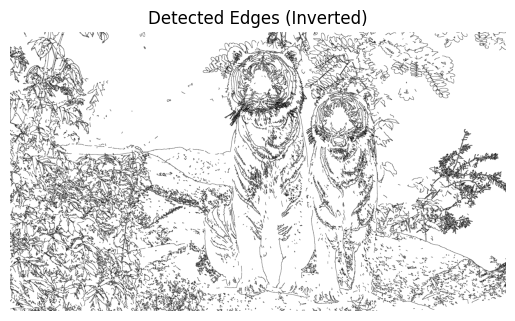

In [24]:
img_input = cv2.imread(INPUT_IMAGE_PATH)
if img_input is None:
    print(f"Error: Could not load input image at {INPUT_IMAGE_PATH}")
else:
    img_edges = edge_detection(img_input)
    save_image(img_edges, 'Q2-output-edges.jpg')
    print("Edge detection complete.")
    

plt.imshow(img_edges, cmap='gray')
plt.title('Detected Edges (Inverted)')
plt.axis('off')
plt.show()

### Step 2: Bilateral Filter

Implement Bilateral filter. This function should be implemented from scratch and you are not allowed to use any existing function or library other than `numpy`.

In [25]:
def bilateral_filter(img: np.ndarray, d: int, sigma_space: float, sigma_color: float):
  
  if img is None:
      print("Error: Input image to bilateral_filter is None.")
      return None

  img_float = img.astype(np.float64)  
  height, width = img.shape[:2]
  channels = img.shape[2] if len(img.shape) == 3 else 1

  radius = d // 2
  padded_img = np.pad(img_float, ((radius, radius), (radius, radius), (0, 0))
                      if channels > 1 else ((radius, radius), (radius, radius)), mode='reflect')

  x, y = np.meshgrid(np.arange(-radius, radius + 1),
                     np.arange(-radius, radius + 1))
  spatial_dist_sq = x**2 + y**2
  spatial_weights = np.exp(-spatial_dist_sq / (2 * sigma_space**2))

  output_img = np.zeros_like(img_float)

  for i in range(height):
      for j in range(width):
          row_start, row_end = i, i + d
          col_start, col_end = j, j + d

          if channels > 1:
              neighborhood = padded_img[row_start:row_end,
                                        col_start:col_end, :]
              center_pixel_color = padded_img[i + radius, j + radius, :]
          else:
              neighborhood = padded_img[row_start:row_end, col_start:col_end]
              center_pixel_color = padded_img[i + radius, j + radius]

          if channels > 1:
              color_diff_sq = np.sum(
                  (neighborhood - center_pixel_color)**2, axis=2)
          else:
              color_diff_sq = (neighborhood - center_pixel_color)**2

          color_weights = np.exp(-color_diff_sq / (2 * sigma_color**2))
          combined_weights = spatial_weights * color_weights
          norm_factor = np.sum(combined_weights)

          if norm_factor == 0:  
              
              if channels > 1:
                 output_img[i, j, :] = img_float[i, j, :]
              else:
                 output_img[i, j] = img_float[i, j]
          else:
              normalized_weights = combined_weights / norm_factor

              if channels > 1:
                  weights_reshaped = normalized_weights[:, :, np.newaxis]
                  output_img[i, j, :] = np.sum(
                      neighborhood * weights_reshaped, axis=(0, 1))
              else:
                  output_img[i, j] = np.sum(neighborhood * normalized_weights)

  output_img = np.clip(output_img, 0, 255).astype(np.uint8)
  return output_img

Apply this function on `Q2-input.jpg` and save the result as `Q2-output-bf.jpg`. Use parameters by your choice to get a proper result (blurring should be noticable, but not too much) Your score on this part depends on the quality of the result.

Saved: Images/Outputs\Q2-output-bf.jpg
Bilateral filtering complete.


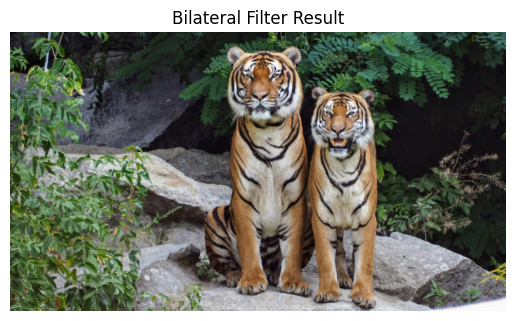

In [26]:
if img_input is not None:
 
    bilateral_d = 9          
    bilateral_sigma_space = 75
    bilateral_sigma_color = 75

    img_bf = bilateral_filter(img_input, bilateral_d,
                              bilateral_sigma_space, bilateral_sigma_color)

    if img_bf is not None:
        save_image(img_bf, 'Q2-output-bf.jpg')
        print("Bilateral filtering complete.")

        # Display result
        plt.imshow(cv2.cvtColor(img_bf, cv2.COLOR_BGR2RGB))
        plt.title('Bilateral Filter Result')
        plt.axis('off')
        plt.show()
    else:
        print("Bilateral filtering failed.")
else:
    print("Skipping bilateral filter due to input image loading error.")

### Step 3: Image Cartoonization

Use the previous functions to implement `cartoonize` function. This function takes a colored image `img` and a real number $\alpha$ as input. $\alpha$ will be a real number between 0 and 1, indicating the intensity of cartoonization. $\alpha=0$ means minimal cartoonization; output should be the original image (or very close to it) and as $\alpha$ approaches to 1, cartoonization should be more intense. Note that the dimensionality of the result should be the same as the input. Your score on this part depends on the quality of the result.

In [27]:
def cartoonize(img: np.ndarray, alpha: float):

  if img is None:
    print("Error: Input image to cartoonize is None.")
    return None

  if not 0 <= alpha <= 1:
      print("Warning: alpha should be between 0 and 1. Clamping.")
      alpha = np.clip(alpha, 0, 1)


  d = 9
  sigma_space = 75
  sigma_color = 75
  img_bf = bilateral_filter(img, d, sigma_space, sigma_color)
  if img_bf is None:
      print("Error during bilateral filtering step in cartoonize.")
      return img  


  img_edge = edge_detection(img)

  img_edge_3c = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2BGR)
  img_bf_uint8 = img_bf.astype(np.uint8)
  img_edge_3c_uint8 = img_edge_3c.astype(np.uint8)
  cartoon_effect = cv2.bitwise_and(img_bf_uint8, img_edge_3c_uint8)

  output_img = cv2.addWeighted(img, 1 - alpha, cartoon_effect, alpha, 0)

  return output_img

Apply the method on `Q2-input.jpg` for $\alpha=0, 0.25, 0.5, 1$ and save the results as `Q2-output-0.jpg`, `Q2-output-1.jpg`,`Q2-output-2.jpg` and `Q2-output-3.jpg`, respectively.

Applying cartoonization with alpha = 0...
Saved: Images/Outputs\Q2-output-0.jpg


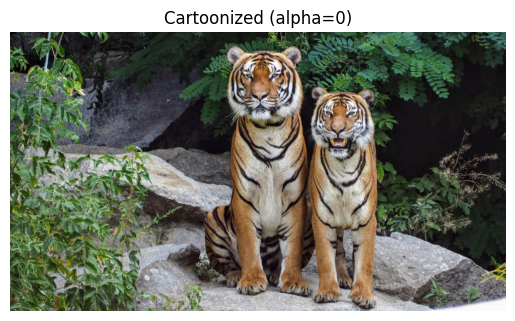

Applying cartoonization with alpha = 0.25...
Saved: Images/Outputs\Q2-output-1.jpg


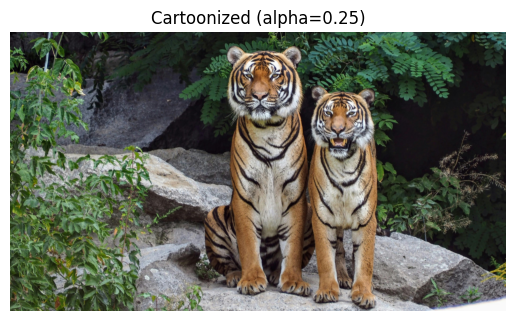

Applying cartoonization with alpha = 0.5...
Saved: Images/Outputs\Q2-output-2.jpg


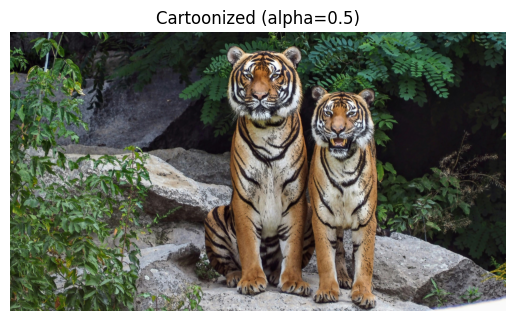

Applying cartoonization with alpha = 1...
Saved: Images/Outputs\Q2-output-3.jpg


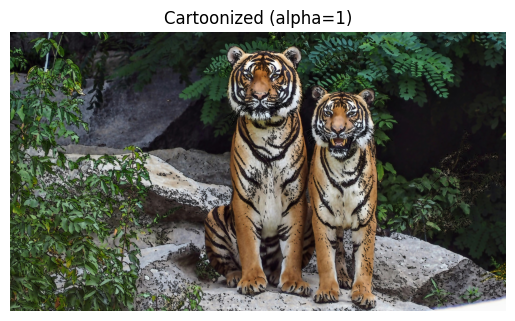

Cartoonization complete for all alpha values.


In [28]:
if img_input is not None:
    alphas = [0, 0.25, 0.5, 1]
    output_filenames = [
        'Q2-output-0.jpg',  
        'Q2-output-1.jpg',  
        'Q2-output-2.jpg',  
        'Q2-output-3.jpg'
    ]

    for i, alpha in enumerate(alphas):
        print(f"Applying cartoonization with alpha = {alpha}...")
        img_cartoonized = cartoonize(img_input, alpha)
        if img_cartoonized is not None:
            save_image(img_cartoonized, output_filenames[i])
            
            # Display result
            plt.imshow(cv2.cvtColor(img_cartoonized, cv2.COLOR_BGR2RGB))
            plt.title(f'Cartoonized (alpha={alpha})')
            plt.axis('off')
            plt.show()
        else:
            print(f"Cartoonization failed for alpha = {alpha}")

    print("Cartoonization complete for all alpha values.")
else:
    print("Skipping cartoonization due to input image loading error.")
